In [1]:
import pandas as pd
import ssl
import numpy as np
from pathlib import Path
import sqlalchemy

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential, Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

database_connection_string = 'sqlite:///SP500.db'
engine = sqlalchemy.create_engine(database_connection_string)

## Reading the input data from the database

In [2]:
SectorDF = pd.read_sql_table('SectorDF', engine)
SectorDF = SectorDF.drop(columns=['timestamp'])
SectorDF

,SPY Open,SPY Close,Industrials,Health Care,Information Technology,Communication Services,Consumer Staples,Consumer Discretionary,Utilities,Financials,Materials,Real Estate,Energy,SPY
0,413.79,415.87,-0.000804,0.000509,-0.004617,-0.004491,-0.001597,-0.002539,0.007733,0.010694,0.009282,-0.004979,0.020342,1.0
1,417.29,417.26,0.000453,0.011926,0.004855,0.003417,0.005316,-0.004535,0.011355,-0.001082,0.004324,0.011913,-0.006888,0.0
2,416.26,415.21,-0.003498,0.002819,-0.002692,-0.003881,0.001754,0.002421,0.002735,-0.004246,-0.001499,-0.003487,-0.018957,0.0
3,413.93,412.17,-0.004149,-0.000356,-0.009452,-0.002727,-0.002429,-0.007847,-0.005995,-0.003404,-0.005562,0.002253,-0.001944,0.0
4,411.55,416.07,-0.008910,0.002328,-0.005653,-0.007387,0.009700,-0.015166,0.012631,-0.011951,-0.008709,0.011858,-0.025533,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,448.04,447.57,0.005856,0.021049,0.005208,-0.009337,0.008555,0.004695,-0.003217,-0.001480,0.004416,-0.004456,0.002626,0.0
250,444.11,439.92,-0.005791,0.005426,-0.007141,0.001863,0.001890,0.004482,0.001318,0.002899,0.002020,0.001696,0.027976,0.0
251,443.02,438.29,-0.001636,-0.016449,-0.008222,-0.001345,-0.002333,0.006947,-0.014041,-0.002284,-0.001462,-0.010802,-0.018648,0.0
252,437.96,443.31,-0.005875,-0.009887,-0.015830,-0.014729,0.000453,-0.009666,0.006666,-0.009787,-0.003684,0.001091,-0.003254,1.0


## Defining the datasets

In [3]:
# Define the target set y using the SPY column
y = SectorDF["SPY"]

# Display a sample of y
y[:5]

0    1.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: SPY, dtype: float64

In [4]:
# Define features set X by selecting all columns but SPY
X = SectorDF.drop(columns=["SPY",'SPY Open','SPY Close'])

# Review the features DataFrame
X.head()

,Industrials,Health Care,Information Technology,Communication Services,Consumer Staples,Consumer Discretionary,Utilities,Financials,Materials,Real Estate,Energy
0,-0.000804,0.000509,-0.004617,-0.004491,-0.001597,-0.002539,0.007733,0.010694,0.009282,-0.004979,0.020342
1,0.000453,0.011926,0.004855,0.003417,0.005316,-0.004535,0.011355,-0.001082,0.004324,0.011913,-0.006888
2,-0.003498,0.002819,-0.002692,-0.003881,0.001754,0.002421,0.002735,-0.004246,-0.001499,-0.003487,-0.018957
3,-0.004149,-0.000356,-0.009452,-0.002727,-0.002429,-0.007847,-0.005995,-0.003404,-0.005562,0.002253,-0.001944
4,-0.008910,0.002328,-0.005653,-0.007387,0.009700,-0.015166,0.012631,-0.011951,-0.008709,0.011858,-0.025533


In [5]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Defining testing parameters and creating Neural Model

In [7]:
# Define the the number of inputs (features) to the model
number_input_features = len(X.iloc[0])

# Review the number of features
number_input_features

11

In [9]:
# Define the number of neurons in the output layer
number_output_neurons = 1

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 = 16 

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 = 16

# Review the number hidden nodes in the second layer
hidden_nodes_layers = hidden_nodes_layer1 + hidden_nodes_layer2
hidden_nodes_layers

32

In [10]:
# Create the Sequential model instance
nn = Sequential()

# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=number_output_neurons, activation="sigmoid"))

In [11]:
# Display the Sequential model summary
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


## Compiling the model and fit the training data

In [12]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
# Fit the model using 350 epochs and the training data
fit_model = nn.fit(X_train_scaled, y_train, epochs=350)

Epoch 1/350
6/6 [==============================] - 0s 2ms/step - loss: 0.7343 - accuracy: 0.4895
Epoch 2/350
6/6 [==============================] - 0s 2ms/step - loss: 0.7223 - accuracy: 0.4895
Epoch 3/350
6/6 [==============================] - 0s 1ms/step - loss: 0.7121 - accuracy: 0.5263
Epoch 4/350
6/6 [==============================] - 0s 1ms/step - loss: 0.7059 - accuracy: 0.5316
Epoch 5/350
6/6 [==============================] - 0s 1ms/step - loss: 0.6994 - accuracy: 0.5421
Epoch 6/350
6/6 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.5579
Epoch 7/350
6/6 [==============================] - 0s 1ms/step - loss: 0.6896 - accuracy: 0.5684
Epoch 8/350
6/6 [==============================] - 0s 1ms/step - loss: 0.6857 - accuracy: 0.5789
Epoch 9/350
6/6 [==============================] - 0s 1ms/step - loss: 0.6827 - accuracy: 0.6000
Epoch 10/350
6/6 [==============================] - 0s 1ms/step - loss: 0.6791 - accuracy: 0.6053
Epoch 11/350
6/6 [===========

## Evaluating the model loss and accuracy using train data

In [14]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the TRAIN data
model_loss, model_accuracy = nn.evaluate(X_train_scaled, y_train,verbose=0)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.22692200541496277, Accuracy: 0.9263157844543457


In [15]:
# Create a DataFrame using the model history and an index parameter
model_plot = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"]) + 1))

<AxesSubplot:>

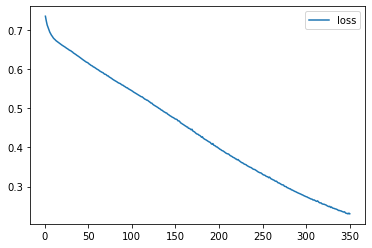

In [16]:
# Vizualize the model plot where the y-axis displays the loss metric
model_plot.plot(y="loss")

<AxesSubplot:>

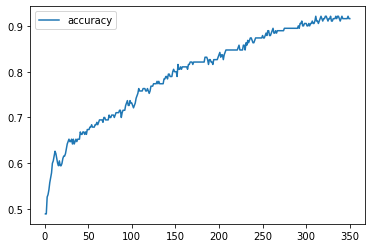

In [17]:
# Vizualize the model plot where the y-axis displays the accuracy metric
model_plot.plot(y="accuracy")

## Evaluating the model loss and accuracy using test data

In [18]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the TEST data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test,verbose=0)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.9621024131774902, Accuracy: 0.578125


## Saving the model

In [19]:
# Set the model's file path
file_path = Path("resources/nnmodel.h5")

# Export your model to an HDF5 file
nn.save(file_path)

# Compute Receiver operating characteristic (ROC)

In [20]:
# output the histogram of predicted X_test
np.histogram(nn.predict(X_test))

(array([ 3,  4, 12, 12, 12, 12,  5,  3,  0,  1], dtype=int64),
 array([0.29955587, 0.3082078 , 0.31685978, 0.32551172, 0.3341637 ,
        0.34281564, 0.35146758, 0.36011955, 0.3687715 , 0.37742347,
        0.3860754 ], dtype=float32))

In [27]:
# generate the y predictions
y_pred = nn.predict(X_test_scaled)

In [22]:
# compute ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(y_test, y_pred)

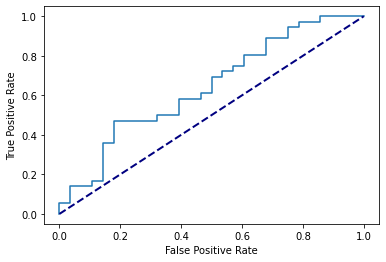

In [24]:
# plot ROC results
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")